In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn import tree
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_pickle("./TempData/preprocessed")
df.head()

,Unnamed: 0,text,label,tweet_length,has_user,has_hashtag,has_url,tidy_tweet,tidy_tweet_tokens,tokens_no_stop
0,0,These girls are the equivalent of the irritati...,racism,99,False,True,False,these girls equivalent irritating asian girls ...,"[these, girl, equivalent, irritate, asian, gir...","[girl, equivalent, irritate, asian, girl, coup..."
1,2,"Colin will save them. They're pretty blondes, ...",sexism,75,False,True,False,colin will save them they pretty blondes they ...,"[will, save, pretty, blonde, keep, tell]","[save, pretty, blonde, keep, tell]"
2,9,Stop saying dumb blondes with pretty faces as ...,sexism,94,False,True,False,stop saying dumb blondes with pretty faces nee...,"[stop, say, dumb, blonde, with, pretty, face, ...","[stop, say, dumb, blonde, pretty, face, need, ..."
3,10,Obviously natural blondes!! #mkr,sexism,32,False,True,False,obviously natural blondes,"[obviously, natural, blonde]","[obviously, natural, blonde]"
4,11,R u fucking kidding - catwalk - all that's mis...,sexism,65,False,True,False,fucking kidding catwalk that missing pole,"[fuck, kid, catwalk, that, miss, pole]","[fuck, kid, catwalk, miss, pole]"


In [3]:
def identity_tokenizer(text):
    return text
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
X = vectorizer.fit_transform(df['tokens_no_stop'].values)


In [4]:
y = np.zeros((len(df['text'])))
for idx, row in df.iterrows():
    if row['label'] not in ['none' ,'normal','NOT']:
        y[idx] = 1

In [5]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=10)
clf = clf.fit(X, y)

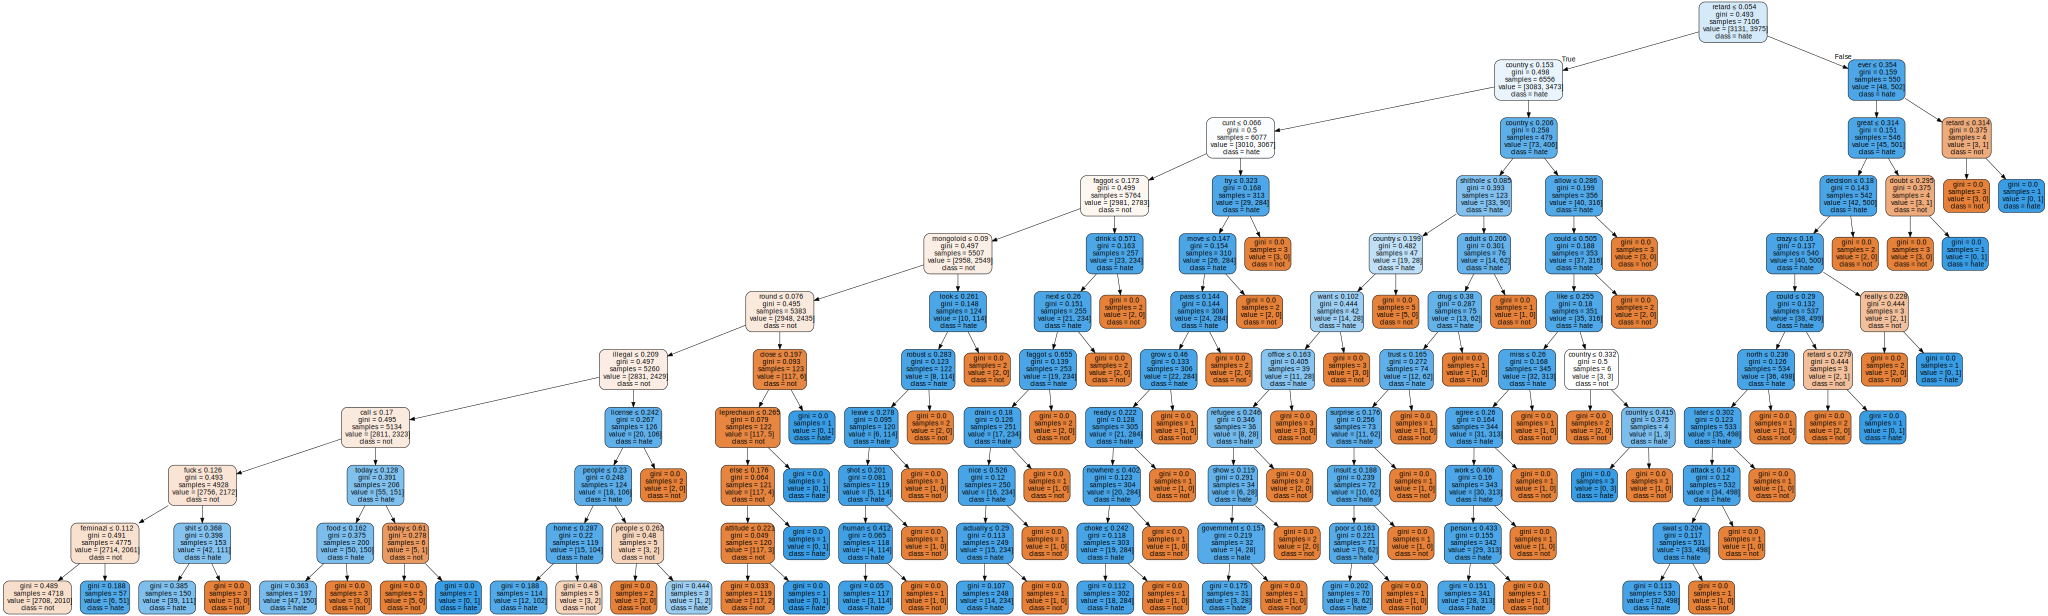

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None,
    class_names=['not','hate'],
    feature_names=vectorizer.get_feature_names(),
    filled=True, rounded=True,  special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("./twitter_data/tree_tfidf_new") 

display(graphviz.Source(dot_data))

## Feature importance
_feature_importances_ attribute on the model can be used to get most important features. It gives the value for each feature, more the value more the importance. The top 20 important features are shown below.

Ver [Feature Importance Measures for Tree Models — Part I](https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3)

In [7]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(vectorizer.get_feature_names(), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print(feature_importances)
top_i = 0
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1

Variable: retard               Importance: 0.1829585233
Variable: country              Importance: 0.1397130688
Variable: cunt                 Importance: 0.1290656061
Variable: faggot               Importance: 0.1228489122
Variable: mongoloid            Importance: 0.0637677511
Variable: round                Importance: 0.0494547216
Variable: illegal              Importance: 0.0448447783
Variable: call                 Importance: 0.0407433686
Variable: fuck                 Importance: 0.0308832895
Variable: feminazi             Importance: 0.0298464776
Variable: today                Importance: 0.0067918503
Variable: could                Importance: 0.0064724506
Variable: try                  Importance: 0.006015604
Variable: allow                Importance: 0.0057503999
Variable: great                Importance: 0.0043320201
Variable: robust               Importance: 0.0042827819
Variable: ever                 Importance: 0.0042690089
Variable: look                 Importance: 0.0041

In [8]:
a = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
a.to_csv("./twitter_data/word_vector_tf_id.csv")
a.head()

,aazadi,abdicate,abduct,abend,abet,abide,ability,able,ableist,abnormal,...,yuuuummmm,zakir,zealot,zeebie,zero,zionist,zomato,zone,zucchini,zyzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
